In [ ]:
import pandas as pd

# Load the revenue data
fy24_budget_data = pd.read_csv('./fy24-adopted-operating-budget.csv')
open_meteo_2021_path = './open-meteo-42.43N71.37W47m (1).csv'
open_meteo_2022_path = './open-meteo-42.43N71.37W47m.csv'
open_both = '/content/open-meteo-52.55N13.41E38m.csv'
# Since the first two rows of the datasets are not data, we'll skip them and re-read the CSVs
df_2021 = pd.read_csv(open_meteo_2021_path, skiprows=2)
df_2022 = pd.read_csv(open_meteo_2022_path, skiprows=2)
open_both = pd.read_csv(open_both, skiprows=2)
# Check for NaN values and replace them with 0
df_2021_filled = df_2021.fillna(0)
df_2022_filled = df_2022.fillna(0)
open_both = open_both.fillna(0)
Calculate the mean temperature for 2021 and 2022 using the correct column name
mean_temp_2021 = df_2021_filled['snowfall_sum (cm)'].mean()
mean_temp_2022 = df_2022_filled['snowfall_sum (cm)'].mean()

mean_temp_2021, mean_temp_2022

In [ ]:
open_both



,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),precipitation (mm),rain (mm),snow_depth (m)
0,2021-01-01T00:00,0.6,94,-0.3,0.0,0.0,0.01
1,2021-01-01T01:00,0.6,94,-0.2,0.0,0.0,0.01
2,2021-01-01T02:00,0.2,95,-0.6,0.0,0.0,0.01
3,2021-01-01T03:00,0.7,94,-0.2,0.0,0.0,0.01
4,2021-01-01T04:00,0.8,94,-0.1,0.0,0.0,0.01
...,...,...,...,...,...,...,...
17515,2022-12-31T19:00,15.7,68,9.9,0.0,0.0,0.00
17516,2022-12-31T20:00,15.4,67,9.2,0.0,0.0,0.00
17517,2022-12-31T21:00,15.0,65,8.6,0.0,0.0,0.00
17518,2022-12-31T22:00,14.6,66,8.3,0.0,0.0,0.00


In [ ]:
fy24_budget_data['Dept'].unique()

array(["Mayor's Office", 'Election Department',
       'Intergovernmental Relations', 'Law Department',
       'Office of Equity', 'Office of Diversity',
       'Office of Resiliency & Racial Equity',
       'Office of Language & Communications Access',
       'Human Right Commission', 'Office for Immigrant Advancement',
       "Women's Advancement", 'Black Male Advancement',
       'Fair Housing & Equity', 'LGBTQ+ Advancement',
       'Commission for Persons with Disabilities',
       'Office of Police Accountability & Transparency',
       'Property Management Department', 'Public Facilities Department',
       'Inspectional Services Department', 'Neighborhood Services',
       'Office of Arts & Culture',
       'Office of Economic Opportunity & Inclusion',
       'Consumer Affairs & Licensing', 'Supplier Diversity',
       'Office of Tourism', 'Labor Compliance and Worker Protection',
       'Youth Employment and Opportunity', 'Boston Public Schools',
       'Environment Department'

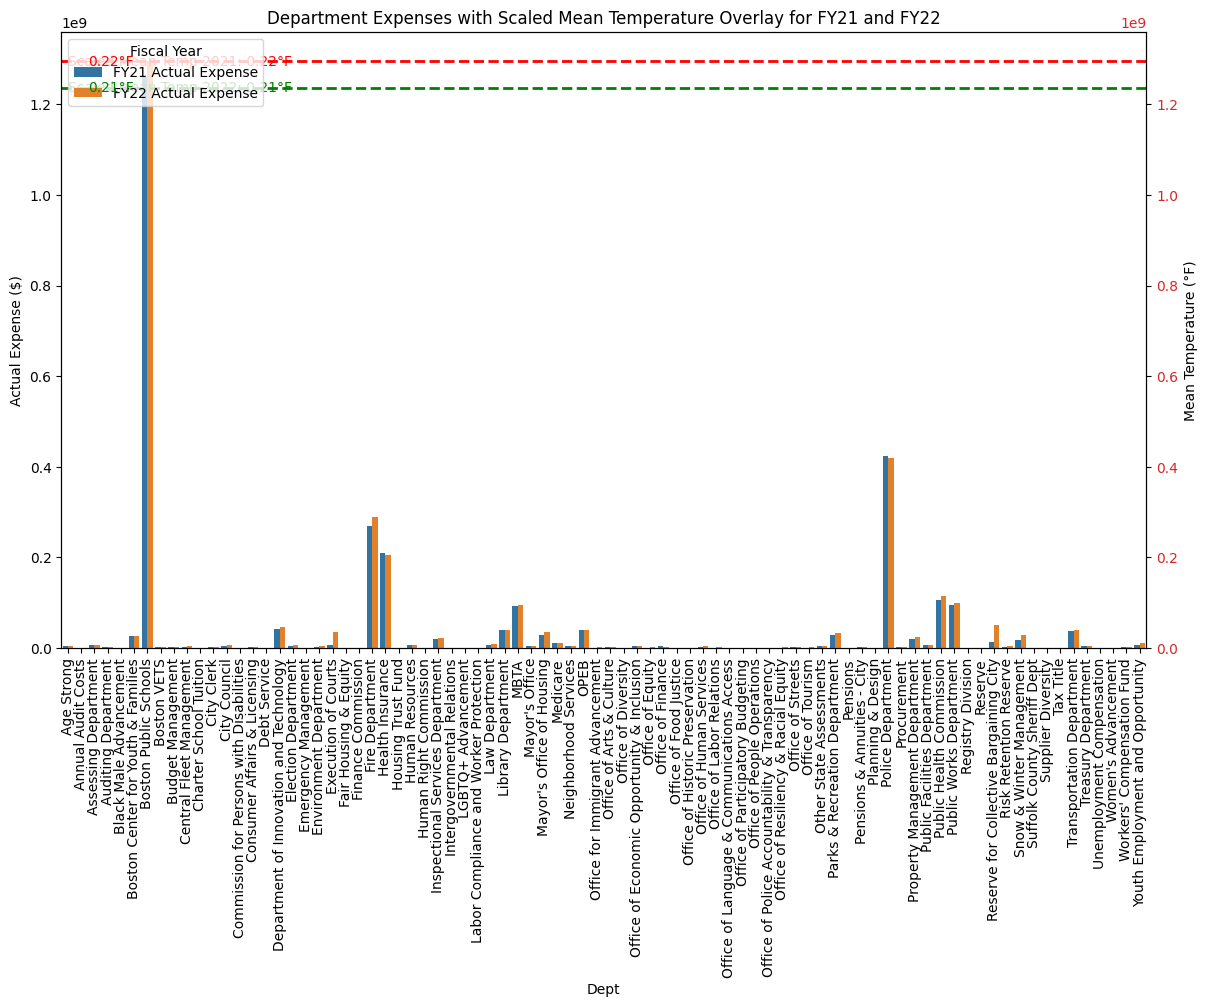

In [ ]:
import matplotlib.pyplot as plt

# Convert the financial data to numeric values, errors='coerce' will replace non-convertible values with NaNs
fy24_budget_data['FY21 Actual Expense'] = pd.to_numeric(fy24_budget_data['FY21 Actual Expense'], errors='coerce')
fy24_budget_data['FY22 Actual Expense'] = pd.to_numeric(fy24_budget_data['FY22 Actual Expense'], errors='coerce')

# Group the data by Department and sum the expenses for FY21 and FY22
grouped_budget_data = fy24_budget_data.groupby('Dept').agg({
    'FY21 Actual Expense': 'sum',
    'FY22 Actual Expense': 'sum'
}).reset_index()

import seaborn as sns
colors = ['#1f77b4', '#ff7f0e']
# Create a combined dataframe for both years
combined_df = grouped_budget_data.melt(id_vars=['Dept'],
                                       var_name='Fiscal Year',
                                       value_name='Expense')

# Convert Fiscal Year to a categorical type to maintain order in plotting
combined_df['Fiscal Year'] = pd.Categorical(combined_df['Fiscal Year'],
                                            categories=['FY21 Actual Expense', 'FY22 Actual Expense'],
                                            ordered=True)

# Start plotting
# Define a scaling factor for temperatures to match the scale of expenses
scaling_factor = max(grouped_budget_data['FY21 Actual Expense'].max(),
                     grouped_budget_data['FY22 Actual Expense'].max()) / max(mean_temp_2021, mean_temp_2022)

# Apply scaling factor to mean temperatures
scaled_mean_temp_2021 = mean_temp_2021 * scaling_factor
scaled_mean_temp_2022 = mean_temp_2022 * scaling_factor

# Create the plot again with scaled temperatures
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for expenses
sns.barplot(x='Dept', y='Expense', hue='Fiscal Year', data=combined_df, palette=colors, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Department Expenses with Scaled Mean Temperature Overlay for FY21 and FY22')
ax1.set_ylabel('Actual Expense ($)')

# Draw scaled mean temperature lines for 2021 and 2022 on the same axis as expenses
ax1.axhline(scaled_mean_temp_2021, color='red', linestyle='--', linewidth=2)
ax1.text(0, scaled_mean_temp_2021, f'Scaled Mean Temp 2021: {mean_temp_2021:.2f}°F', color='red', va='center', ha='left')
ax1.axhline(scaled_mean_temp_2022, color='green', linestyle='--', linewidth=2)
ax1.text(0, scaled_mean_temp_2022, f'Scaled Mean Temp 2022: {mean_temp_2022:.2f}°F', color='green', va='center', ha='left')

# Show the legend
ax1.legend(title='Fiscal Year', loc='upper left')

# Create a secondary y-axis for actual temperature values
ax2 = ax1.twinx()
ax2.set_ylim(ax1.get_ylim())
ax2.set_ylabel('Mean Temperature (°F)')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Annotate the actual mean temperatures on the secondary y-axis
ax2.annotate(f'{mean_temp_2021:.2f}°F', xy=(1, scaled_mean_temp_2021), xytext=(5, 0),
             textcoords='offset points', color='red', va='center')
ax2.annotate(f'{mean_temp_2022:.2f}°F', xy=(1, scaled_mean_temp_2022), xytext=(5, 0),
             textcoords='offset points', color='green', va='center')

plt.show()